# CUNEF MUCD 2021/2022
## News Classification
Autor:  
- Antonio Tello Gómez

# 6. Topic Modeling

In [1]:
#Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

#Functionalities
from collections import Counter
import sys, os

#NLP
import string
import re
import nltk
import gensim
from gensim.utils import simple_preprocess, tokenize
from gensim import corpora, models
import pyLDAvis
from pyLDAvis import gensim_models as gensimvis
pyLDAvis.enable_notebook()

C:\Users\atell\anaconda3\envs\NLP\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [2]:
#Load the clean data 
df = pd.read_csv('../data/fake_or_real_news_clean.csv')

Now, let’s create the bag of words model using gensim

In [3]:
texts = df.clean_text.apply(simple_preprocess)

In [4]:
dic=corpora.Dictionary(texts)
dic.filter_extremes(no_below=2, no_above=0.95)
bow_corpus = [dic.doc2bow(doc) for doc in texts]

In [5]:
tfidf = models.TfidfModel(bow_corpus)
tfidf_corpus = tfidf[bow_corpus]

In [6]:
n_topics = 6

# Build an LDA model
lda_model = models.LdaModel(tfidf_corpus, 
                            id2word=dic, 
                            num_topics=n_topics,
                            random_state=2022,   
                            )

In [7]:
lda_model.print_topics()

[(0,
  '0.001*"endtime" + 0.001*"pageviews" + 0.001*"dotcom" + 0.001*"marriage" + 0.001*"court" + 0.001*"photos" + 0.001*"samesex" + 0.001*"boehner" + 0.000*"vote" + 0.000*"downtime"'),
 (1,
  '0.003*"russian" + 0.002*"russia" + 0.002*"syria" + 0.002*"isis" + 0.001*"syrian" + 0.001*"trump" + 0.001*"saudi" + 0.001*"putin" + 0.001*"military" + 0.001*"us"'),
 (2,
  '0.004*"trump" + 0.002*"cruz" + 0.002*"bush" + 0.002*"percent" + 0.002*"poll" + 0.002*"rubio" + 0.002*"party" + 0.002*"clinton" + 0.001*"republican" + 0.001*"win"'),
 (3,
  '0.001*"trump" + 0.001*"text" + 0.001*"cub" + 0.001*"creamer" + 0.001*"stevens" + 0.001*"cruz" + 0.001*"clinton" + 0.001*"campaign" + 0.001*"veritas" + 0.000*"parenthood"'),
 (4,
  '0.003*"trump" + 0.003*"clinton" + 0.002*"email" + 0.002*"hillary" + 0.001*"vote" + 0.001*"fbi" + 0.001*"say" + 0.001*"election" + 0.001*"obama" + 0.001*"state"'),
 (5,
  '0.003*"todo" + 0.003*"dismantle" + 0.002*"obamacare" + 0.002*"startups" + 0.002*"verdict" + 0.002*"reform" + 

In [8]:
n_words = 15

topic_words = pd.DataFrame({})

for i, topic in enumerate(lda_model.get_topics()):
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [dic[id] for id in top_feature_ids]
    topic_df = pd.DataFrame({'value': feature_values, 'word': words, 'topic': i})
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True).sort_values('value')

topic_words.head()

,value,word,topic
0,0.000416,clinton,0
1,0.000421,groundwater,0
2,0.000431,trump,0
3,0.000437,supreme,0
4,0.000446,say,3


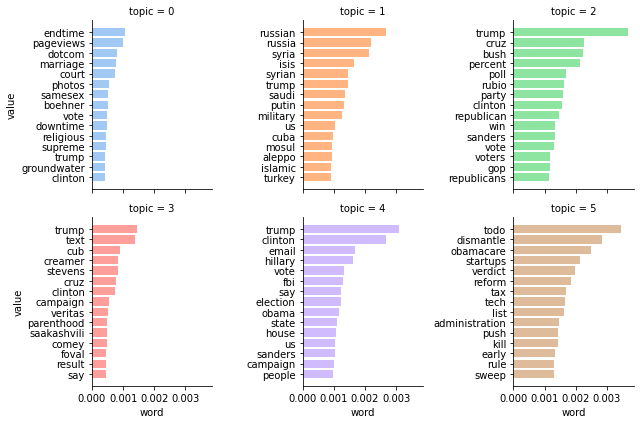

In [17]:
g = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False,palette='pastel', hue="topic")
g.map(plt.barh, "word", "value")

In [18]:
lda_viz = gensimvis.prepare(lda_model, tfidf_corpus, dic)
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.107418 -0.020058       1        1  72.994241
2     -0.046268  0.048504       2        1  15.644584
1      0.000663 -0.030438       3        1   5.761469
3      0.025950  0.000045       4        1   2.006251
0      0.039565  0.001289       5        1   1.819147
5      0.087509  0.000658       6        1   1.774308, topic_info=           Term        Freq       Total Category  logprob  loglift
377       trump  198.000000  198.000000  Default  30.0000  30.0000
2123  obamacare   21.000000   21.000000  Default  29.0000  29.0000
1902     russia   40.000000   40.000000  Default  28.0000  28.0000
693         tax   28.000000   28.000000  Default  27.0000  27.0000
244       obama   69.000000   69.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
1955     inside    0.344541   19.709533   Topic6  -8.1473  -0.0149
377       trump    0.472298  198.602632   Topic6  -7.8319  -2.0097
88        could    0.348535   40.830070   Topic6  -8.1358  -0.7317
794     sanders    0.357653   66.621324   Topic6  -8.1100  -1.1955
68      clinton    0.371316  152.791401   Topic6  -8.0725  -1.9880

[421 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
7748       3  0.625705        abdeslam
2127       1  0.123237        abortion
2127       2  0.862660        abortion
16026      2  0.876951         abstain
1534       1  0.788358  administration
...      ...       ...             ...
872        3  0.019788             win
34027      1  1.008657            wint
415        1  0.812983           would
415        2  0.138802           would
415        3  0.039658           would

[594 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 4, 1, 6])

- Each bubble represents a topic. The larger the bubble, the higher percentage of the number of articles in the corpus is about that topic.
- Blue bars represent the overall frequency of each word in the corpus. If no topic is selected, the blue bars of the most frequently used words will be displayed.
- Red bars give the estimated number of times a given term was generated by a given topic. If you select Topic 1, there are about 160 of the word ‘trump’, and this term is used about 140 times within Topic 1. The word with the longest red bar is the word that is used the most by the articles belonging to that topic.
- The further the bubbles are away from each other, the more different they are. For example, it is difficult to tell the difference between topics 4 and 5

Source: https://neptune.ai/blog/pyldavis-topic-modelling-exploration-tool-that-every-nlp-data-scientist-should-know

## Conlcusion

In our case Topic Modelling is not very insightful. The topics are not very differentiated or sufficiently far apart.  
However, we can draw some conclusions.  
First, some of them are very small and close to each other and the most relevant terms are not informative about the content of the topic. Those are Topics 4,5, and 6. Hence, we could try with fewer topics.  
Second, some of them are large but also close to each other. In this case, the most relevant terms are slightly informative about the content. Topic 1 might be about the General election campaign in 2016. Topic 2 might be about the primaries in both political parties before the elections. Finally, Topic 3, might be about foreign policy and terrorism.